<a href="https://colab.research.google.com/github/joaocarvoli/alura-immersion/blob/main/03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Starting the data immersion
- The data that we'll analyse is about: Mechanisms of Action [MOA](https://www.kaggle.com/c/lish-moa) Prediction.
- This project was based on a challenge of [Laboratory innovation science at Harvard](https://lish.harvard.edu/)
##### *Can you improve the algorithm that classifies drugs based on their biological activity?*



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


![picture](https://drive.google.com/uc?export=view&id=1pWST-DLx_A2Dt1Zi9lNnsH9GIM8rrrqQ)


Importing data...

In [4]:
#@title
import pandas as pd

path_data = '/content/drive/MyDrive/Colab Notebooks/imersao-alura/data/dados_experimentos.zip'
data = pd.read_csv(path_data, compression = 'zip') # The compression is used because the data base is compacted....

Changing column names of genes and molecules

In [5]:
#@title
data.columns = [i.replace('-', '') for i in data.columns] # removing the trace "-" of g,c...

In [6]:
data.head(15)

id tratamento  tempo dose  ...     c96     c97     c98     c99
0   id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1   id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2   id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3   id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4   id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
5   id_001762a82  com_droga     24   D1  ...  1.2120  0.3765  0.7848  1.3990
6   id_001bd861f  com_droga     24   D2  ...  2.4670  0.0357  0.1351 -0.3179
7   id_0020d0484  com_droga     48   D1  ...  0.6633  0.4562 -0.9622  0.0260
8   id_00224bf20  com_droga     48   D1  ... -0.1167 -0.1241 -0.6420  0.5543
9   id_0023f063e  com_droga     48   D2  ... -0.8745 -0.2716  0.0189 -2.0000
10  id_002452c7e  com_droga     72   D2  ...  0.6648  0.0651 -0.0125  0.2600
11  id_0024bcd70  com_droga     48   D2  ...  0.2731  0.6306  0.8285  0.3605
12  id_0025c5949  com_droga     48   D1  ...  0.8592  0.2429  0.3453  0.3083
13  id_00289dc6e  com_droga     48   D2  ...  0.0506 -0.1909  0.7842 -0.6606
14  id_002d31e2c  com_droga     72   D1  ... -8.1330 -4.3170 -6.2390  0.9477

[15 rows x 877 columns]

- We have some id_ that hasn't a pattern...
- We have three columns about drugs: 'tratamento', 'tempo', 'dose' and another columns labels
- Let's know more about each column!

# Let's know what values are contained in each column!

In [7]:
data['id'].unique() # This function returns how many values differents are contained in data

array(['id_000644bb2', 'id_000779bfc', 'id_000a6266a', ...,
       'id_fffc1c3f4', 'id_fffcb9e7c', 'id_ffffdd77b'], dtype=object)

We can suppose that there are many values between,...,

In [8]:
data['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [9]:
data['tempo'].unique()

array([24, 72, 48])

In [10]:
data['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [11]:
data['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

Again, we can suppose that there are many values between,...,

#### The next columns labels are like random values but aren't. They can be important but We won't study them right now

# Let's know how the values are distributed in each column + how percent % !

Each element in the ID column are different so, this column isn't important for us in this specific analysis

In [12]:
print(data['tratamento'].value_counts(),'\n') # This function returns how the data are distributed
treatment = data['tratamento'].value_counts(normalize = True) # This function returns how the data are distributed in percent
treatment = pd.DataFrame(treatment).sort_values(by='tratamento')
treatment

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64 



tratamento
com_controle    0.078357
com_droga       0.921643

In [13]:
print(data['tempo'].value_counts(),'\n')
time = data['tempo'].value_counts(normalize = True)
time = pd.DataFrame(time).sort_values(by='tempo')
time

48    8250
72    7792
24    7772
Name: tempo, dtype: int64 



tempo
24  0.326363
72  0.327202
48  0.346435

In [14]:
print(data['dose'].value_counts(), '\n')
doses = data['dose'].value_counts(normalize = True)
doses = pd.DataFrame(doses).sort_values(by='dose')
doses

D1    12147
D2    11667
Name: dose, dtype: int64 



dose
D2  0.489922
D1  0.510078

In [15]:
print(data['droga'].value_counts(),'\n')
data['droga'].value_counts(normalize = True)

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
b046f598b       1
c1292b6d8       1
b6b4f212d       1
ffe357f8f       1
1502f8cbb       1
Name: droga, Length: 3289, dtype: int64 



cacb2b860    0.078357
87d714366    0.030150
9f80f3f77    0.010330
8b87a7a83    0.008524
5628cb3ee    0.008482
               ...   
b046f598b    0.000042
c1292b6d8    0.000042
b6b4f212d    0.000042
ffe357f8f    0.000042
1502f8cbb    0.000042
Name: droga, Length: 3289, dtype: float64

As we have many types of drugs it is difficult to visualize

# Let's plot these distributions of values in each column

In [16]:
#@title
import matplotlib.pyplot as plt
%matplotlib inline

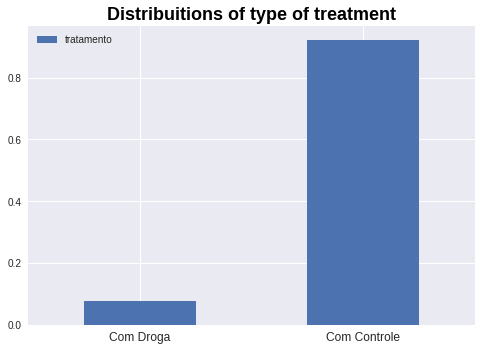

<Figure size 864x576 with 0 Axes>

In [18]:
#@title
fig1 = treatment.plot.bar()

drugs_labels = ['Com Droga', 'Com Controle']
plt.title('Distribuitions of type of treatment', fontweight='bold', fontsize=18, color='black')
plt.style.use("seaborn")
fig1.set_xticklabels(drugs_labels, rotation =360, fontsize=12)
plt.figure(figsize=(12,8), facecolor='gray')
plt.show()

1. Why the tests "com_droga" are bigger than "com_controle" ?



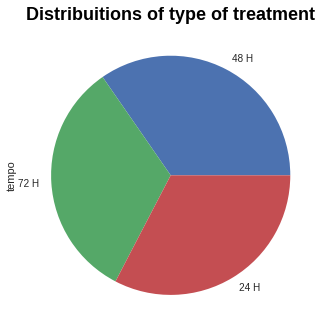

In [20]:
#@title
time_labels = ['48 H', '72 H', '24 H']
data['tempo'].value_counts().plot.pie(labels=time_labels)
plt.title('Distribuitions of type of treatment', fontweight='bold', fontsize=18, color='black')
plt.style.use("seaborn")
plt.show()

The above results are like, so let's do another plot

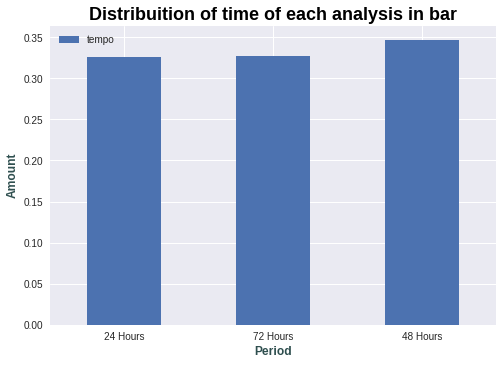

In [21]:
#@title
fig2 = time.plot.bar() # If was be a plot.barh() lines would be horizontals
time_labels2 = ['24 Hours', '72 Hours', '48 Hours']

plt.xlabel('Period', fontweight='bold', fontsize=12, color='darkslategrey')
plt.ylabel('Amount', fontweight='bold', fontsize=12, color='darkslategrey')

fig2.set_xticklabels(time_labels2, rotation =360)
plt.title('Distribuition of time of each analysis in bar', fontweight='bold', fontsize=18, color='black')
plt.style.use("seaborn")

plt.show()

2. The results are like but the 48 is bigger and there is litte difference between 72 and 24. WHY?

#### Let's see how 'dose' are distribuited

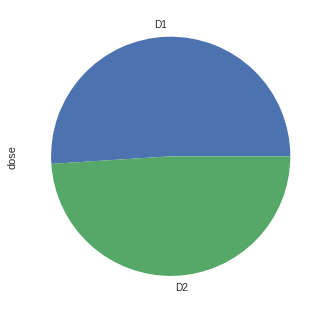

In [22]:
#@title
data['dose'].value_counts().plot.pie()
plt.style.use("seaborn")
plt.show()

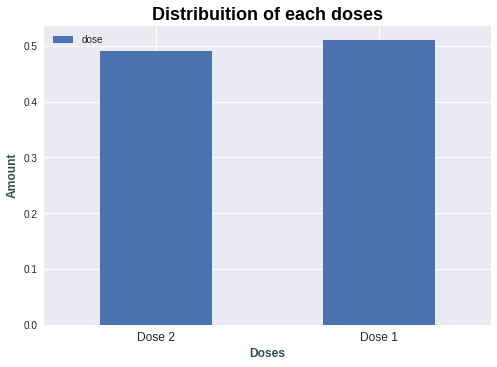

In [23]:
#@title
fig3 = doses.plot.bar()

doses_labels = ['Dose 2', 'Dose 1']
plt.xlabel('Doses', fontweight='bold', fontsize=12, color='darkslategrey')
plt.ylabel('Amount', fontweight='bold', fontsize=12, color='darkslategrey')

fig3.set_xticklabels(doses_labels, rotation =360, fontsize=12)
plt.title('Distribuition of each doses', fontweight='bold', fontsize=18, color='black')
plt.style.use("seaborn")
plt.show()

3. The difference is small, just 480 'doses'. WHY?

### We won't analyze how columns g-...,c-...,...  are distributed because the values "are" random but we will think in another analysis.

In [24]:
#@title
data['g0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

The values are between 1.062 - -0.8598, why? I don't know but let's divide into two groups analyze, bigger than 0 and smaller than 0.

In [25]:
#@title
g_0_above = data[data['g0'] > 0]
g_0_bellow = data[data['g0'] < 0]

In [26]:
#@title
print(f'The shape of g0 that is above 0: {g_0_above.shape} ')
print(f'The shape of g0 that is bellow 0: {g_0_bellow.shape}')

The shape of g0 that is above 0: (11769, 877) 
The shape of g0 that is bellow 0: (12023, 877)


In [27]:
g_0_above.head()

id tratamento  tempo dose  ...     c96     c97     c98     c99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
6  id_001bd861f  com_droga     24   D2  ...  2.4670  0.0357  0.1351 -0.3179
7  id_0020d0484  com_droga     48   D1  ...  0.6633  0.4562 -0.9622  0.0260

[5 rows x 877 columns]

In [28]:
g_0_bellow.head()

id tratamento  tempo dose  ...     c96     c97     c98     c99
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
5  id_001762a82  com_droga     24   D1  ...  1.2120  0.3765  0.7848  1.3990
8  id_00224bf20  com_droga     48   D1  ... -0.1167 -0.1241 -0.6420  0.5543
9  id_0023f063e  com_droga     48   D2  ... -0.8745 -0.2716  0.0189 -2.0000

[5 rows x 877 columns]

4. In g0 there is a little difference in values above and below 0, why?

In [29]:
data.query('g0 > g1 and g1 > g2 and g10 < g1') # Just making a query

id    tratamento  tempo dose  ...     c96     c97     c98     c99
19     id_0036b0342     com_droga     48   D1  ...  0.2853  0.3129  0.4251  0.4308
24     id_00505b3c8     com_droga     72   D2  ... -0.9049 -0.6155  0.3978  0.4596
41     id_0080f169f     com_droga     48   D2  ... -0.4834  0.2414 -0.2525 -0.4595
63     id_009d8340f  com_controle     24   D2  ...  0.0949  0.2000 -0.4326  0.9364
96     id_010629f4f  com_controle     24   D2  ... -1.2790 -0.0619  0.5689  0.0263
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23744  id_ff3ce50e5     com_droga     48   D2  ...  1.1090 -0.4249 -0.8766  0.0244
23770  id_ff8e3f7d3     com_droga     48   D1  ...  0.0638  1.0510 -0.8601  0.0489
23793  id_ffd26f361  com_controle     48   D2  ...  0.8813  0.7757 -0.5272  0.7082
23802  id_fff3976bd     com_droga     24   D1  ... -8.4480 -4.4550 -5.7930 -3.7000
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808

[2073 rows x 877 columns]

> # Questions: 
1.  Why the tests "com_droga" are bigger than "com_controle" ?
2. The results of 'tempo' are like but the 48 is bigger and there is litte difference between 72 and 24. WHY?
3. The difference (between D1 and D2) is small, just 480 'doses'. WHY?
4. In g0 there is a little difference in values above and below 0, why?

> # Answers and Insigths:
- A: We don't have yet
- I: 3289 Drougs tested

## Class 2:

In [30]:
data.head()

id tratamento  tempo dose  ...     c96     c97     c98     c99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125

[5 rows x 877 columns]

In [31]:
#@title
mapa = {'droga': 'composto'} # This name is better because we won't analize literally drugs but composts
data.rename(columns=mapa, inplace=True)

Just making a query...

In [32]:
data.head()

id tratamento  tempo dose  ...     c96     c97     c98     c99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125

[5 rows x 877 columns]

#### To analize better, let's see the most 5 composts used here

In [33]:
#@title
compost_most_used = data['composto'].value_counts().index[:5]
#data['composto'].value_counts().head(5)
compost_most_used

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

#### Let's filter the most 5 compost used to plot a graph

In [34]:
#@title
df_compost_most_used = data.query('composto in @compost_most_used') # Here we're selecting just elements that are in the 'compost_most_used' and contained in column 'composto'
df_compost_most_used

id    tratamento  tempo dose  ...     c96     c97     c98     c99
7      id_0020d0484     com_droga     48   D1  ...  0.6633  0.4562 -0.9622  0.0260
16     id_002fb9c19     com_droga     48   D1  ... -9.9840 -9.9840 -9.9840 -6.7840
25     id_0054388ec  com_controle     48   D1  ...  0.8837  0.5534  0.8976  1.0050
38     id_0079af0fb  com_controle     24   D1  ...  0.2187  0.0737  0.6498 -1.4820
40     id_007bfbb91  com_controle     24   D2  ... -0.5751  0.3362  0.8543  0.9180
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23793  id_ffd26f361  com_controle     48   D2  ...  0.8813  0.7757 -0.5272  0.7082
23802  id_fff3976bd     com_droga     24   D1  ... -8.4480 -4.4550 -5.7930 -3.7000
23805  id_fff6df1c5     com_droga     48   D2  ...  0.1516  0.4503 -0.6312 -0.8302
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740

[3235 rows x 877 columns]

### Let's plot these results

In [37]:
#@title
df_compost_most_used['composto']

7        8b87a7a83
16       87d714366
25       cacb2b860
38       cacb2b860
40       cacb2b860
           ...    
23793    cacb2b860
23802    87d714366
23805    5628cb3ee
23811    cacb2b860
23812    8b87a7a83
Name: composto, Length: 3235, dtype: object

In [38]:
#@title
import seaborn as sns

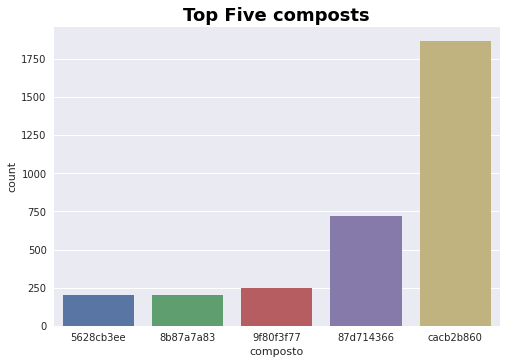

<Figure size 576x432 with 0 Axes>

In [39]:
#@title
ax = sns.countplot(x = 'composto', data=df_compost_most_used, order = df_compost_most_used['composto'].value_counts(ascending = True).index)
sns.set()

plt.title('Top Five composts', fontweight='bold', fontsize=18, color='black')
plt.figure(figsize=(8, 6))
plt.show()

### Let's analyze these g's values that we haven't analyzed so far

#### How much unique data we have just in g0?

In [40]:
#@title
len(data['g0'].unique())

14367

#### Who are the min, max, and mean of this G?

In [41]:
#@title
data['g0'].min() # The min

-5.513

In [42]:
#@title
data['g0'].mean() # The mean

0.24836629293692816

In [44]:
#@title
data['g0'].max() # The max

10.0

#### Let's see how is the behavior of this gene



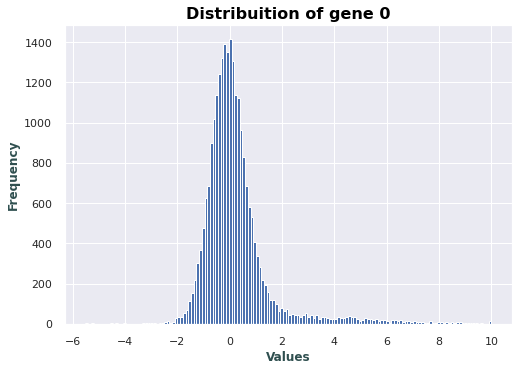

<Figure size 1152x1008 with 0 Axes>

In [45]:
#@title
data['g0'].plot.hist(bins = 150)

plt.ylabel('Frequency', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.xlabel('Values', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.title('Distribuition of gene 0', fontsize = 16, fontweight='bold', color = 'black')

plt.figure(figsize=(16,14))
plt.show()

#### Let's see how is the behavior of gene 50

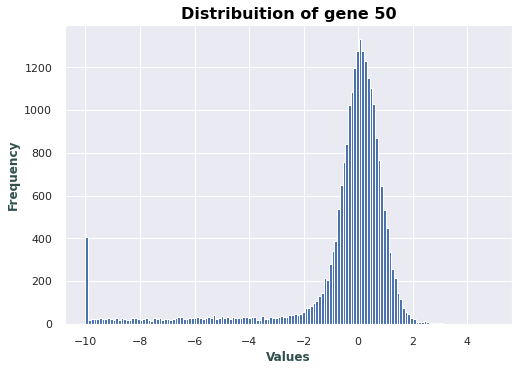

<Figure size 1152x1008 with 0 Axes>

In [46]:
#@title
data['g50'].plot.hist(bins = 150)

plt.ylabel('Frequency', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.xlabel('Values', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.title('Distribuition of gene 50', fontsize = 16, fontweight='bold', color = 'black')

plt.figure(figsize=(16,14))
plt.show()

> ### Question:
 We can understand that each column of g's and c's can be your unique behavior and we cannot analyze all of this data, so let's choose specific genes to analyze. This will be made in the future analysis.

### There is a difference between these graphics, WHY & HOW? Yet we don't know but we'll discover!

# If we wanna know more statistics about our data set, let's use .describe(), it's basic but is a help


- [About .describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [47]:
#@title
data.describe()

tempo            g0  ...           c98           c99
count  23814.000000  23814.000000  ...  23814.000000  23814.000000
mean      48.020156      0.248366  ...     -0.470252     -0.301505
std       19.402807      1.393399  ...      1.834828      1.407918
min       24.000000     -5.513000  ...    -10.000000    -10.000000
25%       24.000000     -0.473075  ...     -0.592600     -0.562900
50%       48.000000     -0.008850  ...      0.014000     -0.019500
75%       72.000000      0.525700  ...      0.461275      0.438650
max       72.000000     10.000000  ...      3.111000      3.805000

[8 rows x 873 columns]

#### Let's see just g's statistics!


In [48]:
#@title
data.loc[:, 'g0':'c0'].describe().T  # Making a transpose of these data

count      mean       std     min       25%      50%       75%     max
g0    23814.0  0.248366  1.393399  -5.513 -0.473075 -0.00885  0.525700  10.000
g1    23814.0 -0.095684  0.812363  -5.737 -0.562200 -0.04660  0.403075   5.039
g2    23814.0  0.152253  1.035731  -9.104 -0.437750  0.07520  0.663925   8.257
g3    23814.0  0.081971  0.950012  -5.998 -0.429575  0.00805  0.463400  10.000
g4    23814.0  0.057347  1.032091  -6.369 -0.470925 -0.02690  0.465375  10.000
...       ...       ...       ...     ...       ...      ...       ...     ...
g768  23814.0  0.134162  0.951264  -4.269 -0.353100  0.00540  0.409075  10.000
g769  23814.0 -0.128018  1.230636 -10.000 -0.544600  0.00060  0.498500   5.911
g770  23814.0 -0.219210  1.326193 -10.000 -0.554400  0.02870  0.496400  10.000
g771  23814.0  0.101524  1.417674 -10.000 -0.523800 -0.00650  0.536950  10.000
c0    23814.0 -0.355156  1.752565 -10.000 -0.549300 -0.00900  0.448975   3.365

[773 rows x 8 columns]

In [49]:
#@title
g_s = data.loc[:, 'g0':'g771'].describe().T
g_s

count      mean       std     min       25%      50%       75%     max
g0    23814.0  0.248366  1.393399  -5.513 -0.473075 -0.00885  0.525700  10.000
g1    23814.0 -0.095684  0.812363  -5.737 -0.562200 -0.04660  0.403075   5.039
g2    23814.0  0.152253  1.035731  -9.104 -0.437750  0.07520  0.663925   8.257
g3    23814.0  0.081971  0.950012  -5.998 -0.429575  0.00805  0.463400  10.000
g4    23814.0  0.057347  1.032091  -6.369 -0.470925 -0.02690  0.465375  10.000
...       ...       ...       ...     ...       ...      ...       ...     ...
g767  23814.0 -0.076251  1.115477 -10.000 -0.506200  0.00990  0.511175   6.317
g768  23814.0  0.134162  0.951264  -4.269 -0.353100  0.00540  0.409075  10.000
g769  23814.0 -0.128018  1.230636 -10.000 -0.544600  0.00060  0.498500   5.911
g770  23814.0 -0.219210  1.326193 -10.000 -0.554400  0.02870  0.496400  10.000
g771  23814.0  0.101524  1.417674 -10.000 -0.523800 -0.00650  0.536950  10.000

[772 rows x 8 columns]

### Calculating statistics from .describe() function

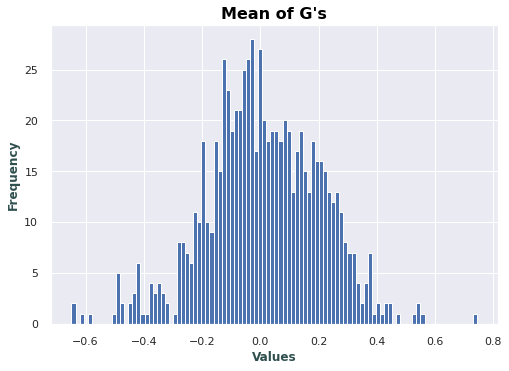

In [50]:
#@title
g_s['mean'].plot.hist(bins = 100)

plt.xlabel('Values', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.ylabel('Frequency', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.title("Mean of G's",fontsize = 16, fontweight='bold', color = 'black')

plt.show()

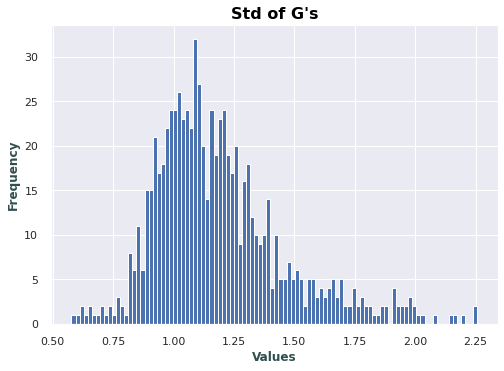

In [51]:
#@title
g_s['std'].plot.hist(bins = 100)

plt.xlabel('Values', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.ylabel('Frequency', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.title("Std of G's",fontsize = 16, fontweight='bold', color = 'black')

plt.show()

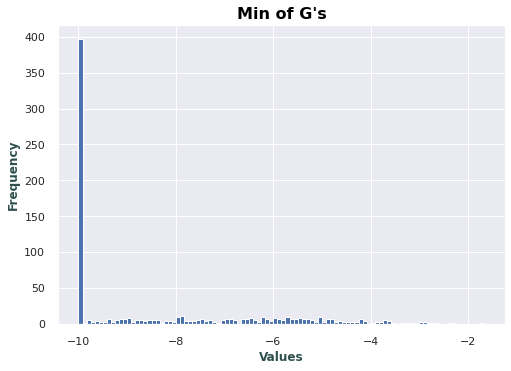

In [52]:
#@title
g_s['min'].plot.hist(bins = 100)

plt.xlabel('Values', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.ylabel('Frequency', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.title("Min of G's",fontsize = 16, fontweight='bold', color = 'black')

plt.show()

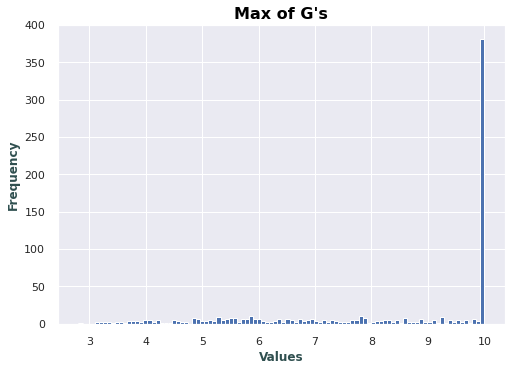

In [53]:
#@title
g_s['max'].plot.hist(bins = 100)

plt.xlabel('Values', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.ylabel('Frequency', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.title("Max of G's",fontsize = 16, fontweight='bold', color = 'black')

plt.show()

#### Let's plot these percentiles
[About the percentiles above - StackOverflow](https://stackoverflow.com/a/39568222/15006363)

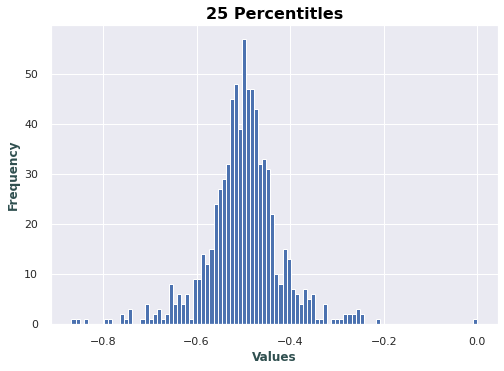

In [54]:
#@title
g_s['25%'].plot.hist(bins = 100)

plt.xlabel('Values', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.ylabel('Frequency', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.title("25 Percentitles",fontsize = 16, fontweight='bold', color = 'black')

plt.show()

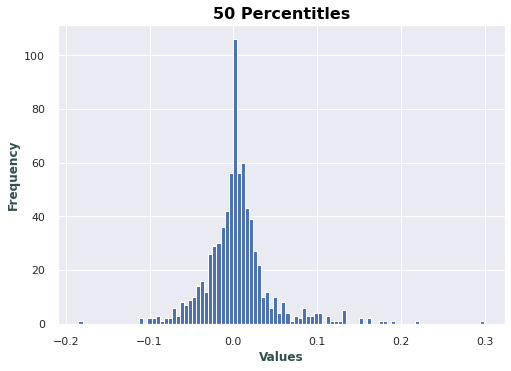

In [55]:
#@title
g_s['50%'].plot.hist(bins = 100)

plt.xlabel('Values', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.ylabel('Frequency', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.title("50 Percentitles",fontsize = 16, fontweight='bold', color = 'black')

plt.show()

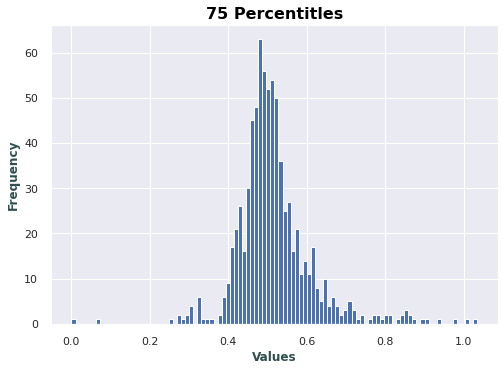

In [56]:
#@title
g_s['75%'].plot.hist(bins = 100)

plt.xlabel('Values', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.ylabel('Frequency', fontsize = 12, fontweight='bold', color = 'darkslategrey')
plt.title("75 Percentitles",fontsize = 16, fontweight='bold', color = 'black')

plt.show()

#### Making a box plot of 'g0' and 'tratamento' to see the distribuition better
- [Box Plot](https://en.wikipedia.org/wiki/Box_plot)
- [Using Matplotlib - documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Using Seaborn - documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)


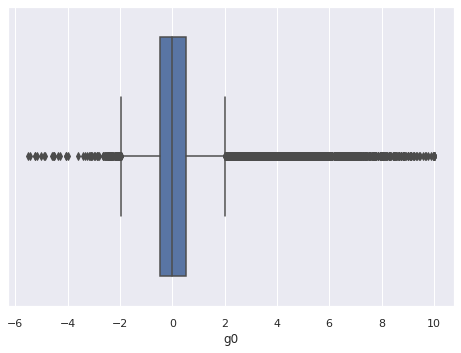

In [57]:
#@title
sns.boxplot(x='g0' , data=data) # In this format we just analize a axes

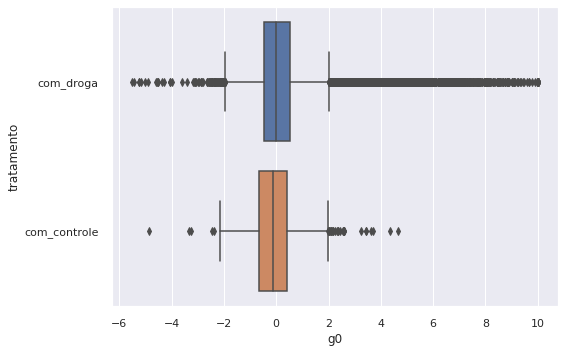

In [58]:
#@title
sns.boxplot(x='g0',y='tratamento', data=data)

> # Questions:
1. Why is there a difference between different g's?
2. What can we conclude with .describe statistics?
3. What can we conclude with these box plots?


> # Answers and Insights:
1. We don't know yet
2. There is pattern in max and min, both are 10 and -10...
3. 
- com_droga: There are so many outliers, the limit above is more like the com_controle 
- com_controle: There are no many outliers, the limit below is a little different in relation to com_droga

# Class 3:

# Let's see how our data is related

#### To build a frequency tab: [pandas.crosstab()](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

In [59]:
pd.crosstab(data['dose'], data['tempo'])

tempo    24    48    72
dose                   
D1     3886  4354  3907
D2     3886  3896  3885

In [61]:
pd.crosstab([data['dose'], data['tempo']], data['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

To calculates a proportion between these variables

In [62]:
pd.crosstab([data['dose'], data['tempo']], data['tratamento'], normalize='index') 

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [63]:
pd.crosstab([data['dose'], data['tempo']], data['tratamento'], normalize='columns') 

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

We can understand that there is a pattern. The values of each column are very well distribuited but there is a difference, in dose['D1'],tempo['48'] and tratamento['com_droga'] and tratamento['com_controle'] in relation to the other variables.

- We can also use some function with crosstab directing to a specific data

In [64]:
pd.crosstab([data['dose'], data['tempo']], data['tratamento'], values = data['g0'], aggfunc='mean') 

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

To analyze specific variables the crosstab() isn't the better option but we can use another type of visualization like a [scatter plot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

In [65]:
data[['g0', 'g10']] # Filtering our data base

g0     g10
0      1.0620  1.1830
1      0.0743 -1.1520
2      0.6280 -0.4797
3     -0.5138 -0.8269
4     -0.3254 -0.2219
...       ...     ...
23809  0.1394  0.2531
23810 -1.3260 -0.1851
23811  0.3942 -0.1854
23812  0.6660  0.5742
23813 -0.8598  1.9460

[23814 rows x 2 columns]

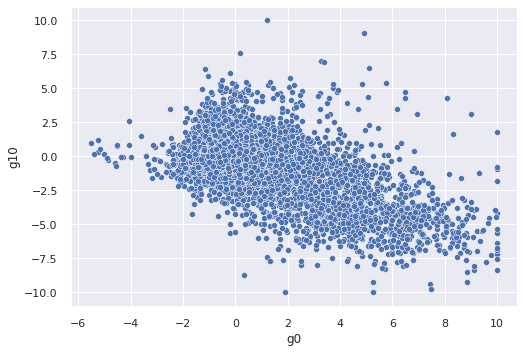

<Figure size 720x864 with 0 Axes>

In [66]:
sns.scatterplot(data=data, x = 'g0', y = 'g10')
plt.figure(figsize=(10,12))
plt.show()

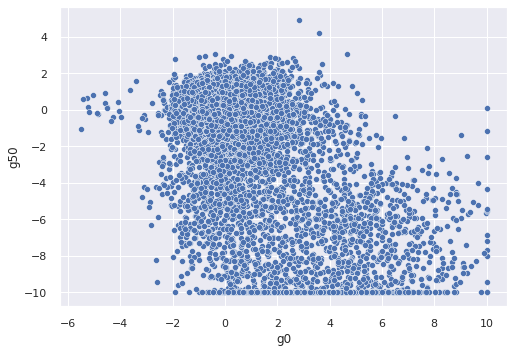

<Figure size 720x864 with 0 Axes>

In [67]:
sns.scatterplot(data=data, x = 'g0', y = 'g50')
plt.figure(figsize=(10,12))
plt.show()

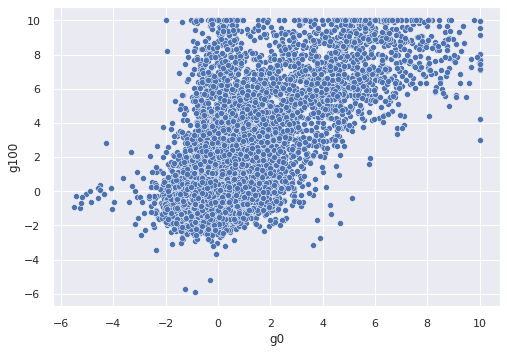

<Figure size 720x864 with 0 Axes>

In [68]:
sns.scatterplot(data=data, x = 'g0', y = 'g100')
plt.figure(figsize=(10,12))
plt.show()

Just with the scatter plot, we cannot see what is the tendency of this data... To see it we can use the lmplot [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html).

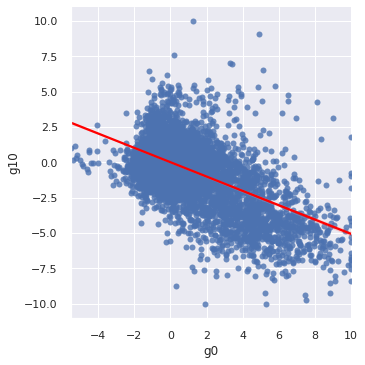

In [69]:
sns.lmplot(data=data, x = 'g0', y = 'g10',  line_kws = {'color': 'red'})

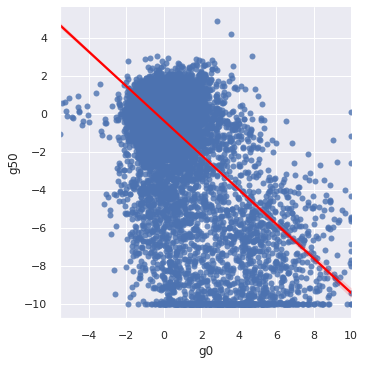

In [70]:
sns.lmplot(data=data, x = 'g0', y = 'g50',  line_kws = {'color': 'red'})

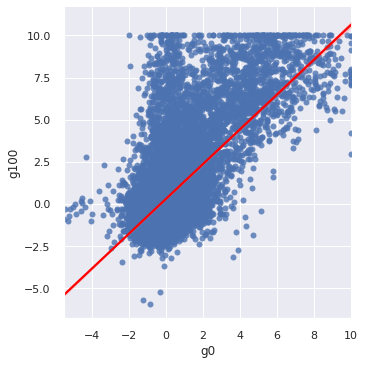

In [71]:
sns.lmplot(data=data, x = 'g0', y = 'g100',  line_kws = {'color': 'red'})

We made these graphs, but we still don't show that there is a pattern or something interesting, let's do a more complete analysis.

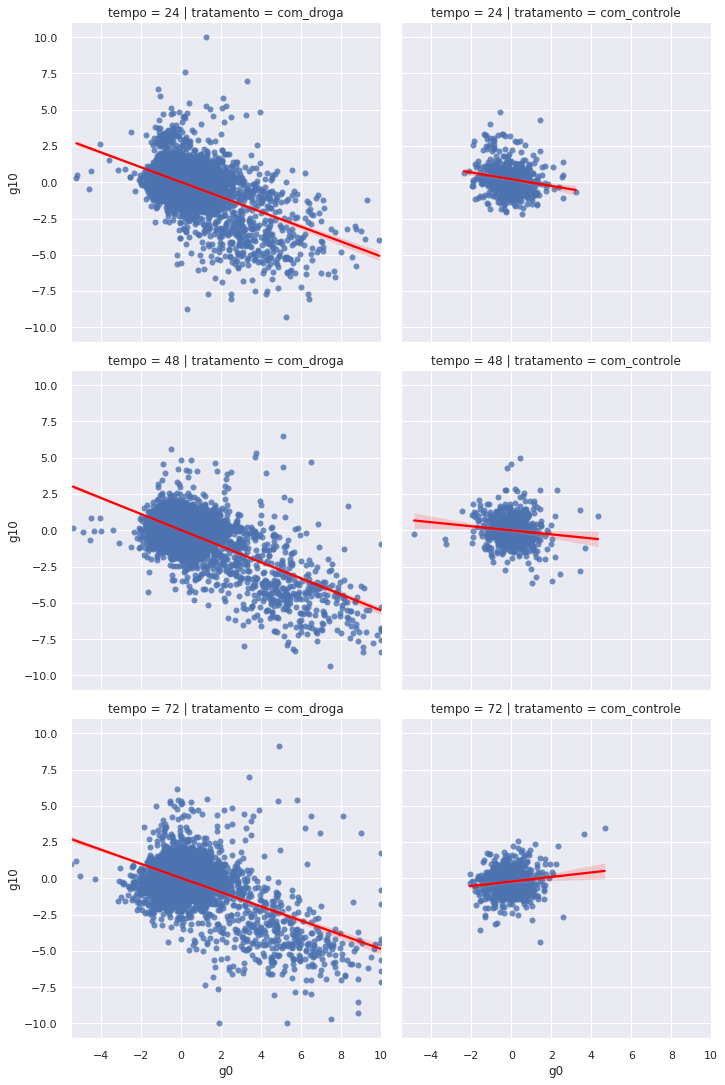

In [72]:
sns.lmplot(data=data, x = 'g0', y = 'g10',  line_kws = {'color': 'red'}, col = 'tratamento', row = 'tempo')

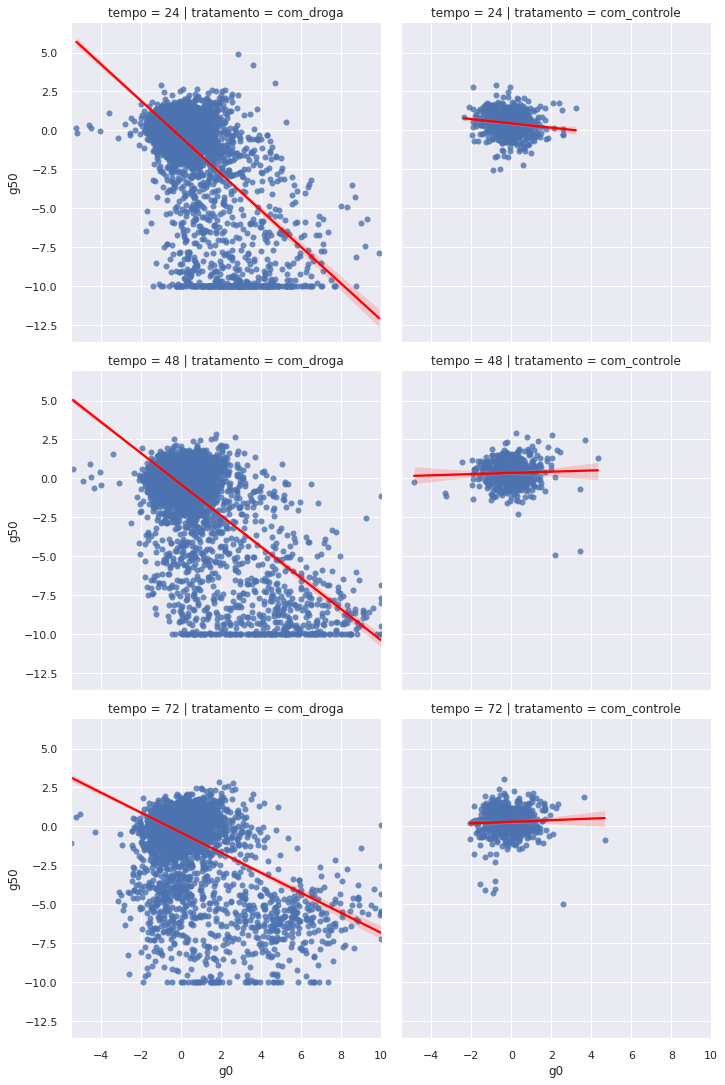

In [73]:
sns.lmplot(data=data, x = 'g0', y = 'g50',  line_kws = {'color': 'red'}, col = 'tratamento', row = 'tempo')

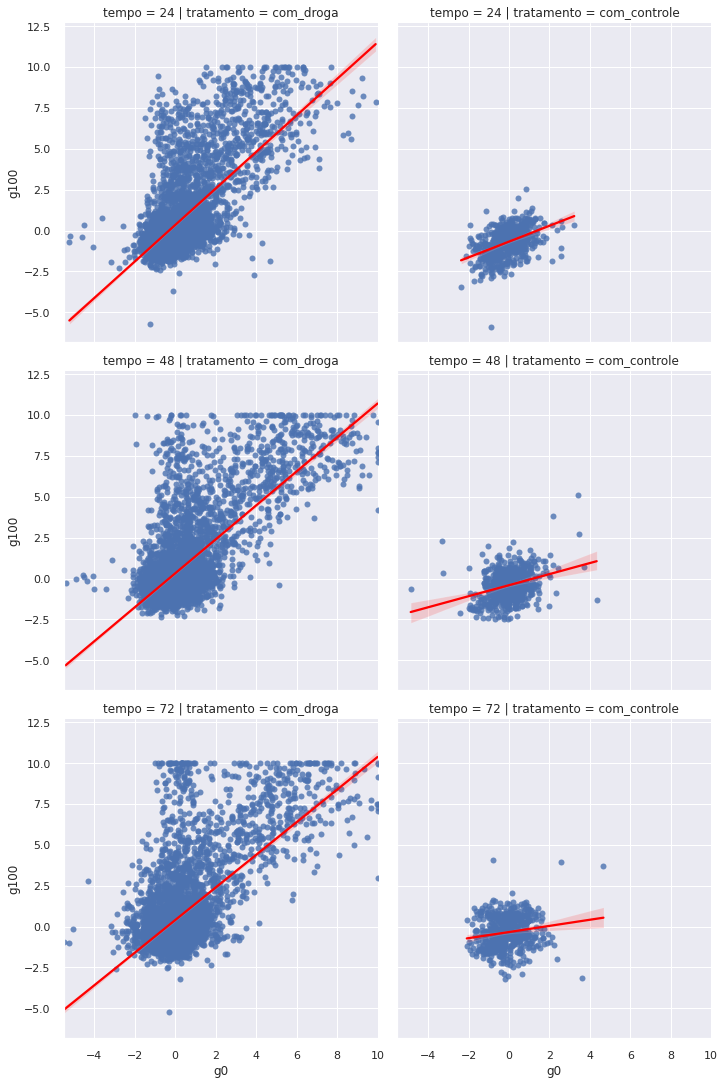

In [74]:
sns.lmplot(data=data, x = 'g0', y = 'g100',  line_kws = {'color': 'red'}, col = 'tratamento', row = 'tempo')

With these analysis we can see more things and extract more insights

- There is a function that is called [.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html), it calculates the correlation between variables.
1. If the result is near 0, the variables that are being compared are not related
2. If the result is near  1, the variables are related proportionally
3. If the result is near -1, the variables are inversely proportional

In [75]:
data.loc[:, 'g0':'g771'].corr()

g0        g1        g2  ...      g769      g770      g771
g0    1.000000  0.086032  0.176188  ... -0.127375 -0.514201  0.405908
g1    0.086032  1.000000 -0.054518  ... -0.006866 -0.095108 -0.032233
g2    0.176188 -0.054518  1.000000  ...  0.014489 -0.078661  0.103985
g3    0.011266 -0.027855  0.042633  ... -0.206077 -0.002142  0.058219
g4    0.403153  0.193647  0.013968  ... -0.172727 -0.363673  0.250713
...        ...       ...       ...  ...       ...       ...       ...
g767 -0.052622 -0.003378 -0.053149  ...  0.065450  0.008603 -0.001136
g768  0.300241 -0.030756  0.115415  ...  0.079364 -0.382607  0.351651
g769 -0.127375 -0.006866  0.014489  ...  1.000000  0.135853 -0.083713
g770 -0.514201 -0.095108 -0.078661  ...  0.135853  1.000000 -0.425063
g771  0.405908 -0.032233  0.103985  ... -0.083713 -0.425063  1.000000

[772 rows x 772 columns]

Above We have many data and analyze each for each is a difficult task, so let's select a break and plot a heat map ([diagonal correlation matrix](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) to analyze better. 
* Obs: The correlation cannot always define the cause

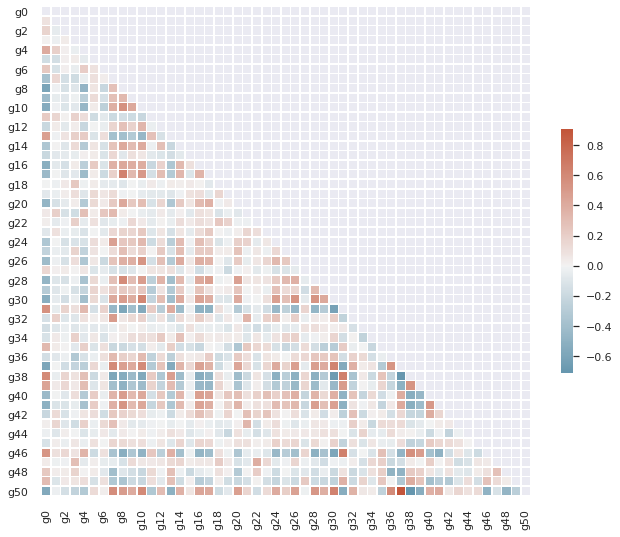

In [79]:
import numpy as np
corr_genes = data.loc[:, 'g0':'g50'].corr()

mask = np.triu(np.ones_like(corr_genes, dtype=bool)) # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(11, 9)) # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap
sns.heatmap(corr_genes, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # Draw the heatmap with the mask and correct aspect ratio

Let's see how the heat map of ``` c's ```, their correlations.
- The ```c's```are the [celular viability](https://www.cellsignal.com/science-resources/cell-viability-and-survival)

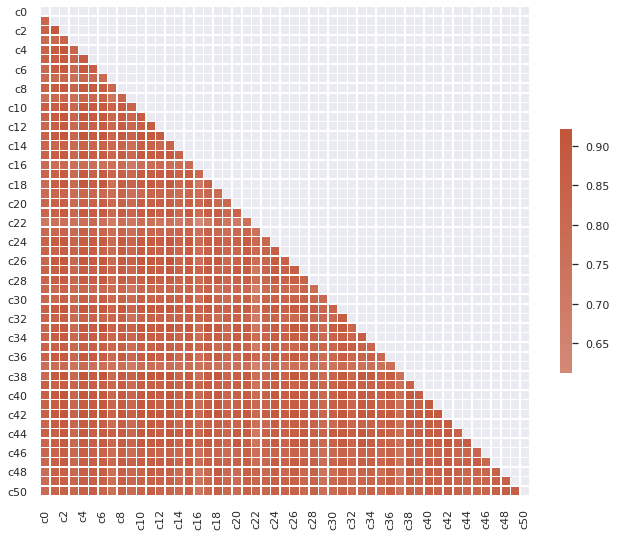

In [80]:
corr_cellular = data.loc[:, 'c0':'c50'].corr()

mask = np.triu(np.ones_like(corr_cellular, dtype=bool)) 
f, ax = plt.subplots(figsize=(11, 9)) 
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
sns.heatmap(corr_cellular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})